# We Rate Dogs Analysis
In this project, I am trying to analysze the 'We Rate Dogs' twitter handle's tweets where they rate various dogs. These tweets contain a picture and are favourited, retweeted several times. As part of this, I am gathering data from Udacity's Twitter archive and from Twitter using Tweepy API. Eventually I will assess, clean, analyze this dataset and finally come up with some insights and visualizations.

## Gathering Data

In [1]:
#import all the reqd libs
import pandas as pd
import numpy as np
import os
import json
import requests 
import matplotlib.pyplot as plt
import unicodedata 
import tweepy
import bs4
from PIL import Image
from io import BytesIO


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

pd.set_option('display.max_columns', None)  


#### Manual File Download
Manually Download the WeRateDogs Twitter archive from UDacity and import it into the workspace.

In [2]:
twitter_archive_enh = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enh.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Gathering data directly from the internet using HTTP
In this section we will try to gather data directly from the internet using Python **Requests** library.

In [3]:
#img url
img_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(img_pred_url) 
#print(response) # returns <Response [200]>, that means HTTP 200 Ok status
#Store the response in a file, file name should be the last string in the url, mode='wb' 
with open(img_pred_url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)# once the file is created, write the response.content



In [4]:
#import the file into workspace
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Gathering data using Twitter API (lib Tweepy)
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [5]:
#Tweepy access info
consumer_key = '' #remove later
consumer_secret = '' #remove latwr
access_token = '' #remove later
access_secret = '' #remove later

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#### Get tweet JSON data using tweet id

In [6]:
#check the tweet_ids for nulls
sum(twitter_archive_enh.tweet_id.isnull())

0

In [7]:
len(twitter_archive_enh)

2356

For below funtion definition, I referred the following and modified as per need : https://medium.com/analytics-vidhya/fetch-tweets-using-their-ids-with-tweepy-twitter-api-and-python-ee7a22dcb845

In [8]:
#Function to to download json objects for each of the tweet ids
def createDataSet(dog_tweets_file, target_result_file):
    '''Function to download json objects for each of the tweet ids.
    
    It takes the tweet file name, where first column contains tweet ids. 
    And, it returns a list of dictionaries contain json objects
    '''
    import csv
    import time

    counter = 0
    dog_tweets = []

    with open(dog_tweets_file, 'r') as csv_file:
        line_reader = csv.reader(csv_file, delimiter=',', quotechar="\"")
        for row in line_reader:
            dog_tweets.append({"tweet_id": row[0]})

    #sleep_time = 2
    tweets_dataset = []
    #Logging exceptions file
    logf = open("tweets_do_not_exist.log", "w")
    #Log successful tweet ids to file
    
    for tweet in dog_tweets:
        try:
            tweet_fetched = api.get_status(tweet["tweet_id"])
            #append the json of the status object resturned by get_status
            tweets_dataset.append(tweet_fetched._json)
            #add a sleep time after each attempt
            #time.sleep(sleep_time)

        except:
            #log exception to file
            logf.write("Failed to get_status() for tweet_id : {} ".format(tweet["tweet_id"]))
            continue
    # once all the tweets have been fetched, print it all in the target file                    
    with open(target_result_file, 'w') as outfile:
        try:
            json.dump(tweets_dataset, outfile,indent = 2)
        except Exception as e:
                    print(e) 
    return tweets_dataset


In [9]:

import os
import os.path
from os import path

dog_tweets_file = "twitter-archive-enhanced.csv"

target_result_file = "tweet_json.txt"


# Call the method if the file doesnt exist
if(os.path.isfile(target_result_file)):
       print('File is already downloaded')
else :
    resultFile = createDataSet(dog_tweets_file, target_result_file)



File is already downloaded


#### Read back the JSON dump and create dataframe


In [10]:
#read back the json txt file
with open('tweet_json.txt', 'r') as j:
     #loads function helps in loading everything in json format, 
     #easy to access individual ele,ents later
        tweets_dicts = json.loads(j.read()) 

In [11]:
#Looking at an individual element
#tweets_dicts[0]

In [12]:
#for dicts in tweet_dicts
tweets_json = pd.DataFrame(tweets_dicts, columns = ['id', 'retweet_count', 'favorite_count','source'])
#df = df.sort_values('ranking').reset_index(drop=True)
tweets_json.head() 

,id,retweet_count,favorite_count,source
0,892420643555336193,7588,35830,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,5623,30926,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,3720,23281,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,7766,39105,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,8363,37357,"<a href=""http://twitter.com/download/iphone"" r..."


## Assess


### Visual and Programmatic Assessment

#### 1. Twitter Archive Enhanced

In [13]:
twitter_archive_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#wrong datatype
type(twitter_archive_enh.timestamp[0])

str

In [15]:
twitter_archive_enh.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
324,834086379323871233,NaN,NaN,2017-02-21 17:04:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lipton. He's a West Romanian Snuggle P...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834086379...,12,10,Lipton,None,None,None,None
2279,667405339315146752,NaN,NaN,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,None,None,None
109,871166179821445120,NaN,NaN,2017-06-04 00:46:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Dawn. She's just checki...,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,a,None,None,pupper,None
1000,747963614829678593,NaN,NaN,2016-06-29 01:23:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747963614...,10,10,None,None,None,pupper,None
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He's addicted to sandwiches (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156...,9,10,Klevin,None,None,None,None


In [16]:
twitter_archive_enh.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
sum(twitter_archive_enh.duplicated())

0

In [18]:
twitter_archive_enh.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
# What is the most common name of a dog
twitter_archive_enh.name.value_counts().head(35)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Buddy        7
an           7
Toby         7
Bailey       7
Daisy        7
Bella        6
Scout        6
Jax          6
Rusty        6
Leo          6
Dave         6
Koda         6
Jack         6
Milo         6
Stanley      6
Oscar        6
Larry        5
Chester      5
Oakley       5
Finn         5
Bentley      5
Gus          5
Name: name, dtype: int64

In [20]:
#sample dog names
twitter_archive_enh[twitter_archive_enh.name.str.islower()].name.sample(10)

1017        a
2353        a
2212      the
1994        a
2354        a
2211        a
369       one
169     quite
1785        a
1206      old
Name: name, dtype: object

In [21]:
print(twitter_archive_enh.iloc[822].text)
print(twitter_archive_enh.iloc[1603].text)
print(twitter_archive_enh.iloc[2019].text)
print(twitter_archive_enh.iloc[2348].text)
print(twitter_archive_enh.iloc[1385].text)
print(twitter_archive_enh.iloc[682].text)
print(twitter_archive_enh.iloc[2153].text)
print(twitter_archive_enh.iloc[2255].text) 

RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn
This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP
Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt
We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU
RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX
This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://t.co/ODnILTr4QM
This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https

We can see 'a', 'an', 'the', 'very' are also in the most common names.

In [22]:
print('Doggo \n {}\n'.format(twitter_archive_enh.doggo.value_counts()))
print('Floofer \n {}\n'.format(twitter_archive_enh.floofer.value_counts()))
print('Pupper \n {}\n'.format(twitter_archive_enh.pupper.value_counts()))
print('Puppo \n {}\n'.format(twitter_archive_enh.puppo.value_counts()))

Doggo 
 None     2259
doggo      97
Name: doggo, dtype: int64

Floofer 
 None       2346
floofer      10
Name: floofer, dtype: int64

Pupper 
 None      2099
pupper     257
Name: pupper, dtype: int64

Puppo 
 None     2326
puppo      30
Name: puppo, dtype: int64



In [23]:
#Look at the ratings range
twitter_archive_enh.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
twitter_archive_enh[twitter_archive_enh.rating_numerator==0].text

315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object

- There are several single occurances of ratings over 20 and 3 or 4 digits, it may be a mistaken rating.
- 0 numerator does not have any dogs

In [25]:
twitter_archive_enh.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
twitter_archive_enh.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [27]:
slice_non10= twitter_archive_enh[twitter_archive_enh.rating_denominator!=10]
slice_non10[['tweet_id','rating_numerator','rating_denominator','text']]

,tweet_id,rating_numerator,rating_denominator,text
313,835246439529840640,960,0,@jonnysun @Lin_Manuel ok jomny I know you're e...
342,832088576586297345,11,15,@docmisterio account started on 11/15/15
433,820690176645140481,84,70,The floofs have been released I repeat the flo...
516,810984652412424192,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspir...
784,775096608509886464,9,11,"RT @dog_rates: After so many requests, this is..."
902,758467244762497024,165,150,Why does this never happen at my front door......
1068,740373189193256964,9,11,"After so many requests, this is Bretagne. She ..."
1120,731156023742988288,204,170,Say hello to this unbelievably well behaved sq...
1165,722974582966214656,4,20,Happy 4/20 from the squad! 13/10 for all https...
1202,716439118184652801,50,50,This is Bluebert. He just saw that both #Final...


In [28]:
#twitter_archive_enh[twitter_archive_enh.rating_denominator==11].text

print(twitter_archive_enh.iloc[784].text) #Rating is 14/10
print(twitter_archive_enh.iloc[1068].text) #duplicate
print(twitter_archive_enh.iloc[1662].text) #duplicate

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [29]:
twitter_archive_enh[twitter_archive_enh.rating_denominator==15]
#img_predictions[img_predictions.tweet_id==832088576586297345] #Not present in img prediction, so delete

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


In [30]:
twitter_archive_enh[twitter_archive_enh.rating_denominator==16] # no url, leave it as such
twitter_archive_enh[twitter_archive_enh.rating_denominator==16].tweet_id

img_predictions[img_predictions.tweet_id==682808988178739200] # not present, delete

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [31]:
twitter_archive_enh[twitter_archive_enh.rating_denominator==7].expanded_urls
img_predictions[img_predictions.tweet_id==810984652412424192].jpg_url # present here but no rating, fundraiser

1658    https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
Name: jpg_url, dtype: object

In [32]:
pd.set_option('display.max_colwidth', None)
twitter_archive_enh[twitter_archive_enh.rating_denominator==2].text #actual rating 9/10

2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

In [33]:
twitter_archive_enh[twitter_archive_enh.rating_denominator==20].text # multiple dogs

1165                                                                            Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1598    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
Name: text, dtype: object

In [34]:
twitter_archive_enh.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [35]:
## Will analyze 75, 0, 420, 26, 182, 27, 1776, 17, 666
twitter_archive_enh[twitter_archive_enh.rating_numerator==75] # REmove numerator = 0, 75 -> 9.75
twitter_archive_enh[twitter_archive_enh.rating_numerator==420].text # REmove > Snoop Dogg not a dog
twitter_archive_enh[twitter_archive_enh.rating_numerator==26] # Wrong rating = 11.26
twitter_archive_enh[twitter_archive_enh.rating_numerator==182] # remove
twitter_archive_enh[twitter_archive_enh.rating_numerator==27] # Wrong rating = 11.27
twitter_archive_enh[twitter_archive_enh.rating_numerator==1776].text # Not keeping remove
twitter_archive_enh[twitter_archive_enh.rating_numerator==17] # remove multiple dogs
twitter_archive_enh[twitter_archive_enh.rating_numerator==666].tweet_id # remove, not present in img_pred
img_predictions[img_predictions.tweet_id == 855860136149123072] 
# 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [36]:
twitter_archive_enh[twitter_archive_enh.rating_numerator==75] # There is a retweet here, and same dog recorded twice

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


- Dogs are rated on a scale of 10, there are 23 occurences of denominators that are not 10. 
- Denominators are high if there are multiple dogs in the picture, delete such scenarios.
- Denominator = 7 does not have any rating, the text just says that the dog smiles 24/7-> Delete.
- Fix the rating for Denominator = 2 : it is 9/10
- Denominator = 11, id 784 : broken link,id 1068 is wrong rating, id 1662 is wrong rating > fix all three.
- Denominator = 15, 16 there is no url, not present in img_prediction so delete
- Numerators 75 = 9.75, 26 = 11.26, 27 = 11.27
- Numerators 0, 420, 182, 1776, 666 -> Remove, anything > 15 will be removed
- During this investigation also noticed duplicate Dogs info where there is a retweet.
- Dog names in some cases are a, an, the, just, very etc-> basically wrong names identified or no names in the tweet text.


In [37]:
twitter_archive_enh.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [38]:
#probably some duplicate records wrt urls, could be multiple images in a tweet?
sum(twitter_archive_enh.expanded_urls.duplicated())

137

- Expanded urls NaNs are showing as duplicated

In [39]:
dupl=twitter_archive_enh[twitter_archive_enh.expanded_urls.duplicated()]
#list_url=twitter_archive_enh.expanded_urls.value_counts()>1
#twitter_archive_enh[twitter_archive_enh.expanded_urls.isna()]
#list_url

#### 2. Image Predictions

In [40]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
#shows tidiness and quality issue, p1, p2, p3 return non-dog values - tennis_ball, doormat, basketball,scuba_diver
img_predictions.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
1993,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True
1622,803380650405482500,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,bookcase,0.890601,False,entertainment_center,0.019287,False,file,0.009490,False
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,1,leatherback_turtle,0.280835,False,loggerhead,0.123290,False,Dandie_Dinmont,0.086792,True
1593,798694562394996736,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
1565,793845145112371200,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,1,Old_English_sheepdog,0.765277,True,Bedlington_terrier,0.112753,True,Kerry_blue_terrier,0.047662,True
1020,710153181850935296,https://pbs.twimg.com/media/Cdr4jO2UAAAIo6W.jpg,2,cowboy_hat,0.979053,False,sombrero,0.010682,False,cocker_spaniel,0.002713,True


In [42]:
#display the decrive output in non-scientific notation
#Ref : https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation
pd.options.display.float_format = '{:.3f}'.format
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075.000,2075.000,2075.000,2075.000,2075.000
mean,738451357852539008.000,1.204,0.595,0.135,0.060
std,67852033330235656.000,0.562,0.271,0.101,0.051
min,666020888022790144.000,1.000,0.044,0.000,0.000
25%,676483507139540992.000,1.000,0.364,0.054,0.016
50%,711998809858043904.000,1.000,0.588,0.118,0.049
75%,793203448525178880.000,1.000,0.844,0.196,0.092
max,892420643555336192.000,4.000,1.000,0.488,0.273


In [43]:
img_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [44]:
#prediction dog breeds
print('P1 \n {}\n'.format(img_predictions.p1.value_counts()))

P1 
 golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
African_grey            1
silky_terrier           1
harp                    1
starfish                1
basketball              1
Name: p1, Length: 378, dtype: int64



In [45]:
img_predictions.p1.sample(5)

1012                 cocker_spaniel
1596                 Siberian_husky
60      West_Highland_white_terrier
1371                   African_grey
604                           llama
Name: p1, dtype: object

In [46]:
img_predictions[img_predictions.p1.str.islower()].p1.sample(5)

465      boxer
1091     swing
1589    beagle
212        pot
588     kelpie
Name: p1, dtype: object

In [47]:
#where predictions are all false for dog
img_predictions[~img_predictions.p1_dog & ~img_predictions.p2_dog & ~img_predictions.p3_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933,False,mud_turtle,0.046,False,terrapin,0.018,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.966,False,cock,0.034,False,partridge,0.000,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.087,False,desk,0.086,False,bookcase,0.079,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.915,False,otter,0.015,False,great_grey_owl,0.013,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996,False,skunk,0.002,False,hamster,0.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.252,False,umbrella,0.115,False,traffic_light,0.070,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473,False,Indian_elephant,0.246,False,ibex,0.056,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.739,False,sports_car,0.140,False,car_wheel,0.044,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130,False,tow_truck,0.029,False,shopping_cart,0.026,False


There are so many values apart from dog breeds such as canoe,peacock, tricycle. Even if the p1_conf, p2_conf, p3_conf variables are all false, in some cases there is a dog in the picture.

In [48]:
#check for duplicate records
sum(img_predictions.duplicated())

0

In [49]:
#duplicate images-> could be retweets
sum(img_predictions.jpg_url.duplicated())

66

#### 3. Tweets json

In [50]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2331 non-null   int64 
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
 3   source          2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [51]:
tweets_json.sample(6)

,id,retweet_count,favorite_count,source
983,747600769478692864,551,2303,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2058,670811965569282048,253,1073,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2245,667502640335572993,209,514,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>"
1237,710153181850935296,875,2853,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1307,705591895322394625,1130,3115,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
462,815966073409433600,8492,22545,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


In [52]:
sum(tweets_json.duplicated())

0

In [53]:
tweets_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
source            0
dtype: int64

In [54]:
tweets_json.retweet_count

0       7588
1       5623
2       3720
3       7766
4       8363
        ... 
2326      40
2327     130
2328      41
2329      42
2330     458
Name: retweet_count, Length: 2331, dtype: int64

In [55]:
tweets_json.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2197
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [56]:
print('1. twitter-archive-enhanced.csv length :{}'.format(len(twitter_archive_enh)))
print('2. image-predictions.tsv length: {}'.format(len(img_predictions)))
print('3. tweet_json.txt length: {}'.format(len(tweets_json)))

1. twitter-archive-enhanced.csv length :2356
2. image-predictions.tsv length: 2075
3. tweet_json.txt length: 2331


In [57]:
all_columns = pd.Series(list(twitter_archive_enh) + list(img_predictions) + list(tweets_json))
all_columns[all_columns.duplicated()]

17    tweet_id
32      source
dtype: object

In [58]:
img_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64


#### Quality issues
 `twitter_archive_enh` table
- change the datatype of timestamp to datetime and fix the format
- Denominators should be 10, but it is varying if there are more doggos. I will only keep records with one dog in the picture. For individual scenarios:
    - Denominator = 7 does not have any rating, the text just says that the dog smiles 24/7(remove?).
    - Fix the rating for Denominator = 2 : it is 9/10
    - Denominator = 11, id 784 : broken link, id 1068 is wrong rating, id 1662 is wrong rating
    - Denominator = 15, there is no url, leave as such for now
    - Denominator = 16, there is no url, leave as such
- Numerators should not be greater than 15, also multiple issues:
    - Numerators 75 = 9.75, 26 = 11.26, 27 = 11.27
    - Numerators 0, 420, 182, 1776, 666 -> Remove, anything > 15 will be removed
- Change Numerator data type to float
- Change the data type of tweet_id to string
- Dog names have 'a', 'an', 'the', 'very' also in the most common names.
- Lowercase dog names in some cases where wrong dog names are identified.
- Remove duplicate records where retweet_status is True, and later drop the retweet columns
- Duplicate dogs info in case of retweets and replys, delete the instances where retweet_id or in_reply fields are non-null

`img_predictions` table
- 66 duplicate jpg_urls
- Dog breeds are lower case in some predictions p1, p2, p3
- all the variable names starting with p1, p2, p3 are not descriptive
- predictions are not completely true, even if p1_dog, p2_dog, p3_dog are all false, the image shows dog/s`

`tweets_json` table
- remove any unneeded fields

#### Tidiness issues

- In `twitter_archive_enh` table - doggo, fluffer, puppo, pupper should all be in one column
- `img_predictions` p1, p2, p3 sometimes returns objects instead of dog breeds, however in some cases even if all the predictions are false, there are dogs in the image.
- `twitter_archive_enh` table - delete in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp all these columns have mostly nulls. Tweepy API also did not provide sufficient info to populate all these fields.
- `tweets_json` and `twitter_archive_enh` tables both have source field
- `tweets_json` and `twitter_archive_enh` tables source field had html tag and the value together, need to extract value.
- `twitter_archive_enh` table should have a separate tiny_url field extracted from text
- A Tweet is a single entity hence all the related info should be in one place, so join all the tables on tweet_id

## Data Cleaning

In [59]:
# Create copies of all the datasets
tweet_full_clean = twitter_archive_enh.copy()
img_predictions_clean = img_predictions.copy()
tweets_json_clean = tweets_json.copy()

#### 1. Tidiness : In `twitter_archive_enh` table categorical variables- doggo, fluffer, puppo, pupper should all be in one column
<b>Define</b>
Some dogs have been referred by more than one dog slang names.
- replace 'None' with ''
- concatenate all four column values into new column dog_slangterm
- drop the four columns



References:
- Join multiple columns : https://www.geeksforgeeks.org/join-two-text-columns-into-a-single-column-in-pandas/ 


<b>Code</b>

In [60]:
#replace None with blank

tweet_full_clean['doggo'].replace('None', '', inplace=True)
tweet_full_clean['floofer'].replace('None', '', inplace=True)
tweet_full_clean['pupper'].replace('None', '', inplace=True)
tweet_full_clean['puppo'].replace('None', '', inplace=True)

# concat all 4 columns into one
tweet_full_clean['dog_slang'] = tweet_full_clean['doggo'].astype(str)\
+ tweet_full_clean['floofer'].astype(str)+ \
tweet_full_clean['pupper'].astype(str)+\
tweet_full_clean['puppo'].astype(str)

#drop the four columns
tweet_full_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)



<b>Test</b>

In [61]:
tweet_full_clean.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_slang
1991,672622327801233409,nan,nan,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This lil pupper is sad because we haven't found Kony yet. RT to spread awareness. 12/10 would pet firmly https://t.co/Cv7dRdcMvQ,nan,nan,NaN,https://twitter.com/dog_rates/status/672622327801233409/photo/1,12,10,None,pupper
366,828801551087042563,nan,nan,2017-02-07 03:04:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Gus. He likes to be close to you, which is good because you want to be close to Gus. 12/10 would boop then pet https…",810254108431155200.000,4196983835.000,2016-12-17 22:43:27 +0000,https://twitter.com/dog_rates/status/810254108431155201/photo/1,12,10,Gus,
678,789268448748703744,nan,nan,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stella. She's happier than I will ever be. 10/10 would trade lives with https://t.co/JSs2bfDtTS,nan,nan,NaN,https://twitter.com/dog_rates/status/789268448748703744/photo/1,10,10,Stella,
1875,675113801096802304,nan,nan,2015-12-11 00:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Zuzu. He just graduated college. Astute pupper. Needs 2 leashes to contain him. Wasn't ready for the pic. 10/10 https://t.co/2H5SKmk0k7,nan,nan,NaN,https://twitter.com/dog_rates/status/675113801096802304/photo/1,10,10,Zuzu,pupper
307,835685285446955009,nan,nan,2017-02-26 02:57:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rory. He's got an interview in a few minutes. Looking spiffy af. Nervous as h*ck tho. 12/10 would hire https://t.co/…,786963064373534720.000,4196983835.000,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/786963064373534720/photo/1,12,10,Rory,
1876,675111688094527488,nan,nan,2015-12-11 00:35:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Oliver. He thought what was inside the pillow should be outside the pillow. Blurry since birth. 8/10 https://t.co/lFU9W31Fg9,nan,nan,NaN,https://twitter.com/dog_rates/status/675111688094527488/photo/1,8,10,Oliver,
1699,680970795137544192,nan,nan,2015-12-27 04:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I thought I made this very clear. We only rate dogs. Stop sending other things like this shark. Thank you... 9/10 https://t.co/CXSJZ4Stk3,nan,nan,NaN,https://twitter.com/dog_rates/status/680970795137544192/photo/1,9,10,None,


In [62]:
tweet_full_clean.dog_slang.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_slang, dtype: int64

#### 2. Tidiness:  tweets_json and twitter_archive_enh tables source field had html tag and the value together, need to extract value.
<b>Define</b>
- Using BeautifulSoup get_text() method extract the source value from the html tag
- Reference : https://stackoverflow.com/questions/44703945/pandas-trouble-stripping-html-tags-from-dataframe-column

<b>Code</b>

In [63]:
tweet_full_clean['source']=tweet_full_clean['source'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())    
tweets_json_clean['source'] = tweets_json_clean['source'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())    

<b>Test</b>

In [64]:
tweet_full_clean.source.value_counts(), tweets_json_clean.source.value_counts()

(Twitter for iPhone     2221
 Vine - Make a Scene      91
 Twitter Web Client       33
 TweetDeck                11
 Name: source, dtype: int64,
 Twitter for iPhone     2197
 Vine - Make a Scene      91
 Twitter Web Client       33
 TweetDeck                10
 Name: source, dtype: int64)

#### 3. Tidiness -  Extract URLs from the text field
<b>Define</b>
- Extract the tiny url from text using regex.
- Reference : https://blog.softhints.com/python-pandas-extract-url-date-regex/
        
<b>Code</b>

In [65]:
tweet_full_clean['tiny_url'] = tweet_full_clean.text.str.extract(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
#url[(url.duplicated())]

In [66]:
#tweet_full_clean.text.str.split

<b>Test</b>

In [67]:
tweet_full_clean.tiny_url

0       https://t.co/MgUWQ76dJU
1       https://t.co/0Xxu71qeIV
2       https://t.co/wUnZnhtVJB
3       https://t.co/tD36da7qLQ
4       https://t.co/AtUZn91f7f
                 ...           
2351    https://t.co/4B7cOc1EDq
2352    https://t.co/DWnyCjf2mx
2353    https://t.co/y671yMhoiR
2354    https://t.co/r7mOb2m0UI
2355    https://t.co/BLDqew2Ijj
Name: tiny_url, Length: 2356, dtype: object

In [68]:
print(" Empty tiny_urls: {}".format(sum(tweet_full_clean.tiny_url.isnull())))
print(" Duplicate tiny_urls: {}".format(sum(tweet_full_clean.tiny_url.duplicated())))

 Empty tiny_urls: 117
 Duplicate tiny_urls: 204


In [69]:
mask = tweet_full_clean.tiny_url.duplicated() & tweet_full_clean.tiny_url.notnull()
tweet_full_clean[mask].sample(5)
tweet_full_clean[tweet_full_clean.tiny_url == 'https://t.co/YOC1fHFCSb'] #Keep first occurance

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_slang,tiny_url
447,819015331746349057,nan,nan,2017-01-11 02:57:26 +0000,Twitter for iPhone,RT @dog_rates: This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,819006400881917952.000,4196983835.000,2017-01-11 02:21:57 +0000,"https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1",14,10,Sunny,doggo,https://t.co/YOC1fHFCSb
448,819006400881917954,nan,nan,2017-01-11 02:21:57 +0000,Twitter for iPhone,This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,nan,nan,NaN,"https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1",14,10,Sunny,doggo,https://t.co/YOC1fHFCSb


#### 3. Quality -  Wrong data types
<b>Define</b>
- Rename the id column to tweet_id in `tweets_json_clean`
- Strip (+00:00) from timestamp and Convert timestamp in `twitter_archine_enh` to datetime
- Reference : https://stackoverflow.com/questions/32204631/how-to-convert-string-to-datetime-format-in-pandas-python
- Change the data type for rating_numerator to float
- Change data type of retweet_count, favorite_count to int in `tweets_json_clean`

<b>Code</b>

In [70]:
tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2331 non-null   int64 
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
 3   source          2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [71]:
#timestamp, strip and convert
tweet_full_clean['timestamp'] = pd.to_datetime(tweet_full_clean['timestamp'].str.rstrip('+00:00'))

tweets_json_clean.rename(columns={"id": "tweet_id"},inplace=True)

# Change the data type for rating_numerator to float
tweet_full_clean.rating_numerator = tweet_full_clean.rating_numerator.astype(float)


<b>Test</b>

In [72]:
tweet_full_clean.timestamp.sample(10)

2273   2015-11-19 22:32:36
1759   2015-12-21 00:53:29
1558   2016-01-17 18:27:32
1647   2016-01-04 01:53:37
150    2017-05-12 16:05:02
2133   2015-11-27 02:55:47
1679   2015-12-30 02:54:35
418    2017-01-20 15:17:01
1312   2016-03-08 01:25:10
643    2016-10-31 21:00:23
Name: timestamp, dtype: datetime64[ns]

In [188]:
tweet_full_clean.timestamp.describe()

count                    2133
unique                   2133
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

In [189]:
tweet_full_clean.timestamp.dt.year.describe()

count   2133.000
mean    2015.882
std        0.699
min     2015.000
25%     2015.000
50%     2016.000
75%     2016.000
max     2017.000
Name: timestamp, dtype: float64

In [73]:
tweets_json_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'source'], dtype='object')

In [74]:
tweet_full_clean.rating_numerator.dtypes

dtype('float64')

#### 4. Quality - Denominators should be 10 and Fix Numerators too (Handling multiple ratings related quality issues)
<b>Define</b>
- Check the non-10 denominator cases, ensure none of them are wrong ratings
- Fix the wrong ratings 
- In the reamining cases, keep rows with denominator as 10
- Numerators should not be greater than 15, also multiple issues:
    - Numerators 75 = 9.75, 26 = 11.26, 27 = 11.27
    - Numerators 0, 420, 182, 1776, 666 -> Remove, anything > 15 will be removed
<b>Code</b>

In [75]:
#for denominator 11, these are the same tweets with actual rating 14/10
#tweet_full_clean[tweet_full_clean.rating_denominator==11].tweet_id
# tweet ids :775096608509886464, 740373189193256964, 682962037429899265
tweet_full_clean.loc[tweet_full_clean.tweet_id == 775096608509886464, ['rating_numerator']] = 14
tweet_full_clean.loc[tweet_full_clean.tweet_id == 775096608509886464, ['rating_denominator']] = 10

tweet_full_clean.loc[tweet_full_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
tweet_full_clean.loc[tweet_full_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10

tweet_full_clean.loc[tweet_full_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 14
tweet_full_clean.loc[tweet_full_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10


In [76]:
# For denominator 2, rating is 9/10, tweet id : 666287406224695296
tweet_full_clean.loc[tweet_full_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9
tweet_full_clean.loc[tweet_full_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

In [77]:
# for rest of the cases, only keep the data with denominator =10
tweet_full_clean = tweet_full_clean[tweet_full_clean.rating_denominator==10]

In [78]:
# Numerators should not be greater than 15, also multiple issues:
 #   - Numerators 75 = 9.75, 26 = 11.26, 27 = 11.27
tweet_full_clean.loc[tweet_full_clean.tweet_id == 832215909146226688, ['rating_numerator']] = 9.75
tweet_full_clean.loc[tweet_full_clean.tweet_id == 786709082849828864, ['rating_numerator']] = 9.75

tweet_full_clean.loc[tweet_full_clean.tweet_id == 680494726643068929, ['rating_numerator']] = 11.26

tweet_full_clean.loc[tweet_full_clean.tweet_id == 778027034220126208, ['rating_numerator']] = 11.27
    

In [79]:
#  - Numerators 0, 420, 182, 1776, 666 -> Remove, anything > 15 will be removed
tweet_full_clean=tweet_full_clean[tweet_full_clean.rating_numerator<16 ]
tweet_full_clean=tweet_full_clean[tweet_full_clean.rating_numerator > 0 ]

<b>Test</b>

In [80]:
tweet_full_clean[tweet_full_clean.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_slang,tiny_url


In [81]:
tweet_full_clean.rating_denominator.value_counts()

10    2329
Name: rating_denominator, dtype: int64

In [82]:
tweet_full_clean.rating_numerator.value_counts()

12.000    558
11.000    463
10.000    461
13.000    351
9.000     157
8.000     102
14.000     57
7.000      54
5.000      37
6.000      32
3.000      19
4.000      15
2.000       9
1.000       8
15.000      2
9.750       2
11.270      1
11.260      1
Name: rating_numerator, dtype: int64

In [83]:
len(tweet_full_clean) 

2329

#### 5. Quality - Remove duplicate records
<b>Define</b>
- Identify the 66 duplicate records in `img_predictions` based on jpg_urls
- Remove the duplicates, keep the first occurances
- Identify the duplicate dogs data in `twitter_archive_enh` where tiny_url is duplicated and not null
- Keep the first row
<b>Code</b>

In [84]:
#tweet_full_clean
print('Not Null Retweet status count: {}'.format(tweet_full_clean[tweet_full_clean.retweeted_status_id.notnull()].shape))
print('Not Null InReply status count: {}'.format(tweet_full_clean[tweet_full_clean.in_reply_to_status_id.notnull()].shape))
print('Full Count: {}'.format(tweet_full_clean.shape))      
#Subset the table to include null etweeted_status_id, in_reply_to_status_id
#tweet_full_clean = tweet_full_clean[tweet_full_clean.retweeted_status_id.isnull()]
#tweet_full_clean = tweet_full_clean[tweet_full_clean.in_reply_to_status_id.isnull()]
tweet_full_clean.drop_duplicates(subset=['tiny_url'], keep='first',inplace =True)
print('Full Count: {}'.format(tweet_full_clean.shape))  

Not Null Retweet status count: (181, 15)
Not Null InReply status count: (68, 15)
Full Count: (2329, 15)
Full Count: (2133, 15)


In [85]:
#remove duplicates
img_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='first',inplace =True)

<b>Test</b>

In [86]:
#mask = tweet_full_clean.tiny_url.duplicated() & tweet_full_clean.tiny_url.notnull()
#tweet_full_clean[mask].sample(5)
tweet_full_clean[tweet_full_clean.tiny_url == 'https://t.co/YOC1fHFCSb'] #Keep first occurance



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_slang,tiny_url
447,819015331746349057,nan,nan,2017-01-11 02:57:26,Twitter for iPhone,RT @dog_rates: This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,819006400881917952.000,4196983835.000,2017-01-11 02:21:57 +0000,"https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1",14.000,10,Sunny,doggo,https://t.co/YOC1fHFCSb


In [87]:
print('# of duplicated rows jpg_url: {}'.format(sum(img_predictions_clean.jpg_url.duplicated())))
print('# of duplicated rows tiny_url: {}'.format(sum(tweet_full_clean.tiny_url.duplicated())))
print('Rows in Image Prediction table: {}'.format(len(img_predictions_clean)))
print('Full Count of Rows in Twitter_Archive table: {}'.format(tweet_full_clean.shape))  

# of duplicated rows jpg_url: 0
# of duplicated rows tiny_url: 0
Rows in Image Prediction table: 2009
Full Count of Rows in Twitter_Archive table: (2133, 15)


#### 6. Quality- Column names not descriptive
<b>Define</b>
- Change the non-descriptive column in `img_predictions` names using rename()

<b>Code</b>

In [88]:
img_predictions_clean.rename(columns={'p1':'prediction_1', 'p1_conf': 'confidence_1', 'p1_dog': 'is_pred1_dog',
                                  'p2': 'prediction_2', 'p2_conf': 'confidence_2', 'p2_dog': 'is_pred2_dog',
                                  'p3': 'prediction_3', 'p3_conf': 'confidence_3', 'p3_dog': 'is_pred3_dog'}, inplace = True)

<b>Test</b>

In [89]:
img_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1',
       'is_pred1_dog', 'prediction_2', 'confidence_2', 'is_pred2_dog',
       'prediction_3', 'confidence_3', 'is_pred3_dog'],
      dtype='object')

#### 7. Quality - Dog breeds are in lower case in some p1, p2, p3 columns
<b>Define</b>
- Identify the records in `img_predictions` that have lowercase dog breeds
- Change them to uppercase using capitalize()
- Reference : https://www.geeksforgeeks.org/capitalize-first-letter-of-a-column-in-pandas-dataframe/

<b>Code</b>

In [90]:
img_predictions_clean.prediction_1=img_predictions_clean.prediction_1.str.capitalize()
img_predictions_clean.prediction_2=img_predictions_clean.prediction_2.str.capitalize()
img_predictions_clean.prediction_2=img_predictions_clean.prediction_3.str.capitalize()

<b>Test</b>

In [91]:
img_predictions_clean.prediction_1.value_counts().head(10)


Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    55
Chow                   41
Samoyed                40
Toy_poodle             38
Pomeranian             38
Malamute               29
Name: prediction_1, dtype: int64

In [92]:
img_predictions_clean.prediction_1.value_counts().tail(10)

African_grey        1
Otter               1
Book_jacket         1
Cowboy_boot         1
Japanese_spaniel    1
Giant_panda         1
Radio_telescope     1
Pole                1
Carousel            1
Bookcase            1
Name: prediction_1, dtype: int64

In [93]:
# Subsetting the twt_ach_mstr to show only p1, p2, p3, and tweet_id.
img_predictions_clean[['tweet_id','prediction_1','prediction_2','prediction_3']].sample(6)

,tweet_id,prediction_1,prediction_2,prediction_3
574,678446151570427904,Staffordshire_bullterrier,American_staffordshire_terrier,American_Staffordshire_terrier
668,683030066213818368,Boxer,French_bulldog,French_bulldog
731,686683045143953408,Norwich_terrier,Golden_retriever,golden_retriever
1211,742528092657332225,Sunglasses,Snorkel,snorkel
854,696488710901260288,Briard,Giant_schnauzer,giant_schnauzer
392,673580926094458881,Beagle,Walker_hound,Walker_hound


#### 8. Quality- Remove unwanted columns from `tweets_json`
<b>Define</b>
- Drop the source column from `tweets_json`

<b>Code</b>

In [94]:
tweets_json_clean.drop(columns=['source'],axis=1,inplace=True)

<b>Test</b>

In [95]:
tweets_json_clean.columns


Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### 9. Tidiness : twitter_archive_enh tables delete unwanted fields
<b>Define</b>
- From the table `twitter_archive_enh` tables  remove : in_reply_to_status_id, in_reply_to_user_id

<b>Code</b>

In [96]:
tweet_full_clean = tweet_full_clean.drop(columns=
                                         ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                          'retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [97]:
tweet_full_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_slang',
       'tiny_url'],
      dtype='object')

<b>Test</b>

In [98]:
tweet_full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2133 non-null   int64         
 1   timestamp           2133 non-null   datetime64[ns]
 2   source              2133 non-null   object        
 3   text                2133 non-null   object        
 4   expanded_urls       2132 non-null   object        
 5   rating_numerator    2133 non-null   float64       
 6   rating_denominator  2133 non-null   int64         
 7   name                2133 non-null   object        
 8   dog_slang           2133 non-null   object        
 9   tiny_url            2132 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 183.3+ KB


#### 10. Tidiness - Join `img_predictions` and  `tweets_json` with `twitter_archive_enh`
<b>Define</b>
- Left Join `twitter_archive_enh` with `tweets_json` on tweet_id

<b>Code</b>

In [99]:
tweet_full_clean = pd.merge(tweet_full_clean, tweets_json_clean, 
                            on = ['tweet_id'], 
                            how = 'left')

<b>Test</b>

In [100]:
tweet_full_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_slang,tiny_url,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.000,10,Phineas,,https://t.co/MgUWQ76dJU,7588.000,35830.000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.000,10,Tilly,,https://t.co/0Xxu71qeIV,5623.000,30926.000


In [101]:
tweet_full_clean.shape

(2133, 12)

#### 11. Tidiness - Join `img_predictions`  with `twitter_archive_enh`
<b>Define</b>
- Left Join `twitter_archive_enh` with `img_predictions` on tweet_id

<b>Code</b>

In [102]:
tweet_full_clean = pd.merge(tweet_full_clean, img_predictions_clean, 
                            on = ['tweet_id'], 
                            how = 'left')

<b>Test</b>

In [103]:
tweet_full_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_slang,tiny_url,retweet_count,favorite_count,jpg_url,img_num,prediction_1,confidence_1,is_pred1_dog,prediction_2,confidence_2,is_pred2_dog,prediction_3,confidence_3,is_pred3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.000,10,Phineas,,https://t.co/MgUWQ76dJU,7588.000,35830.000,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.000,Orange,0.097,False,Banana,0.086,False,banana,0.076,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.000,10,Tilly,,https://t.co/0Xxu71qeIV,5623.000,30926.000,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.000,Chihuahua,0.324,True,Papillon,0.091,True,papillon,0.069,True


In [104]:
tweet_full_clean.shape

(2133, 23)

In [105]:
tweet_full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2132
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2133 non-null   int64         
 1   timestamp           2133 non-null   datetime64[ns]
 2   source              2133 non-null   object        
 3   text                2133 non-null   object        
 4   expanded_urls       2132 non-null   object        
 5   rating_numerator    2133 non-null   float64       
 6   rating_denominator  2133 non-null   int64         
 7   name                2133 non-null   object        
 8   dog_slang           2133 non-null   object        
 9   tiny_url            2132 non-null   object        
 10  retweet_count       2117 non-null   float64       
 11  favorite_count      2117 non-null   float64       
 12  jpg_url             1924 non-null   object        
 13  img_num             1924 non-null   float64     

#### 12. Quality : Set the dog names to "unknown" where no real dog names are provided

<b>Define</b>
- Identify the names in lowercase
- Change those to 'unknown'
- Reference : https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none

<b>Code</b>

In [106]:
tweet_full_clean.loc[tweet_full_clean['name'] == tweet_full_clean['name'].str.lower(), 'name'] = np.NaN


In [107]:
tweet_full_clean.name.value_counts()

None         632
Charlie       11
Lucy          11
Cooper        10
Oliver        10
            ... 
Alf            1
Schnitzel      1
Jay            1
Traviss        1
Anthony        1
Name: name, Length: 930, dtype: int64

# Data Storing

In [108]:
# Store the data in csv file
tweet_full_clean.to_csv('twitter_archive_master.csv', sep= ',', encoding = 'utf-8',index=False)

# Analyze and Visualize Data

### Questions to be answered:
1. What is the most common dog name?
2. What is the most common dog breed?
3. Which dog is the most popular on internet?
4. What are the popular dog breeds?
5. Which day of the week has the highest number of tweets?


In [109]:
#Load the csv file
df_twitter = pd.read_csv('twitter_archive_master.csv')
df_twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_slang,tiny_url,retweet_count,favorite_count,jpg_url,img_num,prediction_1,confidence_1,is_pred1_dog,prediction_2,confidence_2,is_pred2_dog,prediction_3,confidence_3,is_pred3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.000,10,Phineas,NaN,https://t.co/MgUWQ76dJU,7588.000,35830.000,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.000,Orange,0.097,False,Banana,0.086,False,banana,0.076,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.000,10,Tilly,NaN,https://t.co/0Xxu71qeIV,5623.000,30926.000,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.000,Chihuahua,0.324,True,Papillon,0.091,True,papillon,0.069,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.000,10,Archie,NaN,https://t.co/wUnZnhtVJB,3720.000,23281.000,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.000,Chihuahua,0.716,True,Kelpie,0.078,True,kelpie,0.031,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.000,10,Darla,NaN,https://t.co/tD36da7qLQ,7766.000,39105.000,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.000,Paper_towel,0.170,False,Spatula,0.168,True,spatula,0.041,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.000,10,Franklin,NaN,https://t.co/AtUZn91f7f,8363.000,37357.000,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.000,Basset,0.556,True,German_short-haired_pointer,0.226,True,German_short-haired_pointer,0.175,True


### 1. What is the most common dog name?

In [110]:
df_twitter.name.value_counts().head()

None       632
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Name: name, dtype: int64

<b>Insights</b>
- Most of the tweets don't have dog names
- Otherwise, Lucy is the most popular name with 11 occurances.


### 2. What is the most common dog breed on WeRateDogs?

In [111]:
df_twitter.prediction_1.value_counts().head(1)

Golden_retriever    125
Name: prediction_1, dtype: int64

<b>Insights </b>
- Golden_retreivers are the most common dogs on We Rate Dogs.

### 3. Which dog is the most popular on internet?
Reference : https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python

In [112]:
df_twitter.favorite_count.sort_values(ascending=False) , df_twitter.favorite_count.idxmax()

(884    154393.000
 354    131667.000
 124    115325.000
 921    114188.000
 63      98322.000
           ...    
 629           nan
 684           nan
 748           nan
 788           nan
 1529          nan
 Name: favorite_count, Length: 2133, dtype: float64,
 884)

Dog breed: Labrador_retriever
Favorited: 154393
Retweeted: 76656


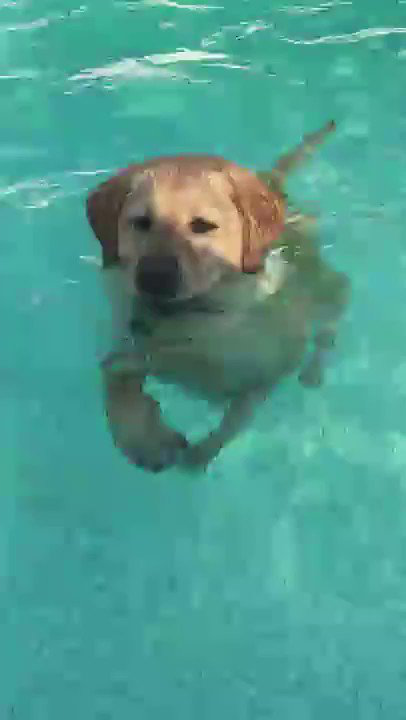

In [113]:
max_df = df_twitter.iloc[df_twitter.favorite_count.idxmax()]
tweet_url = max_df.jpg_url
print('Dog breed: {}'.format(max_df.prediction_1))
print('Favorited: {:.0f}'.format(max_df.favorite_count))
print('Retweeted: {:.0f}'.format(max_df.retweet_count))

r = requests.get(tweet_url)
Image.open(BytesIO(r.content))


<b>Insights</b>
- The above dog is the most favorited 
- Breed: Labrador_retriever
- Favorited count: 154393
- Retweeted count: 76656

### 4.  What are the popular dog breeds?
- Ref : https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

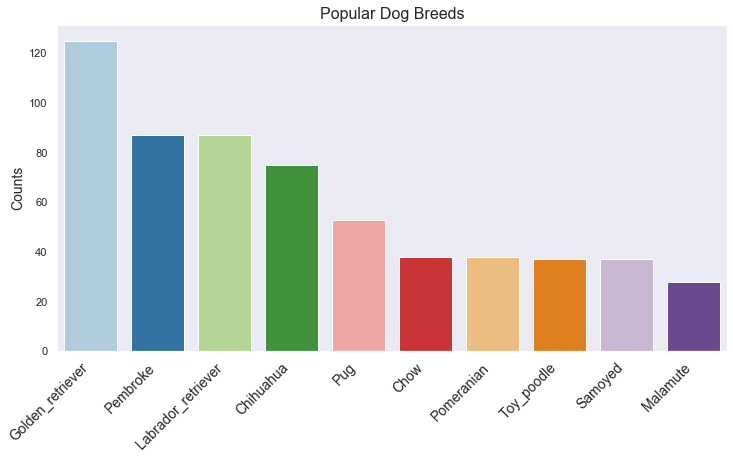

In [170]:
sns.set()
plt.figure(figsize=(12,6))
chart=sns.barplot(data=df_twitter, 
           x = df_twitter.prediction_1.value_counts()[0:10].index.values,
           y = df_twitter.prediction_1.value_counts()[0:10],
                 palette='Paired')
chart.grid(False)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right',fontsize=14 )
chart.set_title('Popular Dog Breeds', fontsize = 16)
chart.set_ylabel('Counts', fontsize = 14);

<b>Insights</b>
- Golden retrievers are the most popular breed on WeRateDogs' twitter account.
- Labrador retrievers and Pembroke are second.

### 5. Which day of the week has the highest number of tweets?


In [115]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2133 non-null   int64  
 1   timestamp           2133 non-null   object 
 2   source              2133 non-null   object 
 3   text                2133 non-null   object 
 4   expanded_urls       2132 non-null   object 
 5   rating_numerator    2133 non-null   float64
 6   rating_denominator  2133 non-null   int64  
 7   name                2032 non-null   object 
 8   dog_slang           346 non-null    object 
 9   tiny_url            2132 non-null   object 
 10  retweet_count       2117 non-null   float64
 11  favorite_count      2117 non-null   float64
 12  jpg_url             1924 non-null   object 
 13  img_num             1924 non-null   float64
 14  prediction_1        1924 non-null   object 
 15  confidence_1        1924 non-null   float64
 16  is_pre

In [116]:
df_twitter.timestamp=pd.to_datetime(df_twitter['timestamp'])

In [117]:
df_weekdays = df_twitter[['timestamp', 'rating_numerator', 'favorite_count','retweet_count']]

Reference : https://stackoverflow.com/questions/60214194/error-in-reading-stock-data-datetimeproperties-object-has-no-attribute-week

In [179]:
df_weekdays['day_name'] = df_weekdays.timestamp.dt.dayofweek

# Calculating the mean of ratings.
df_mean = df_weekdays.groupby(['day_name']).mean()
df_mean.index = ['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday']
df_mean.columns = ['avg_rating','avg_favorite','avg_retweet']
df_mean

/Users/nehatarey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,avg_rating,avg_favorite,avg_retweet
Monday,10.480,7315.059,2372.325
Tuesday,10.717,7529.374,2506.613
Wednesday,10.533,7428.990,2596.674
Thursday,10.816,6744.396,2282.336
Friday,10.810,6853.055,2361.028
Saturday,10.727,8023.537,2715.359
Sunday,10.463,6907.447,2134.824


For below code, Reference : https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged

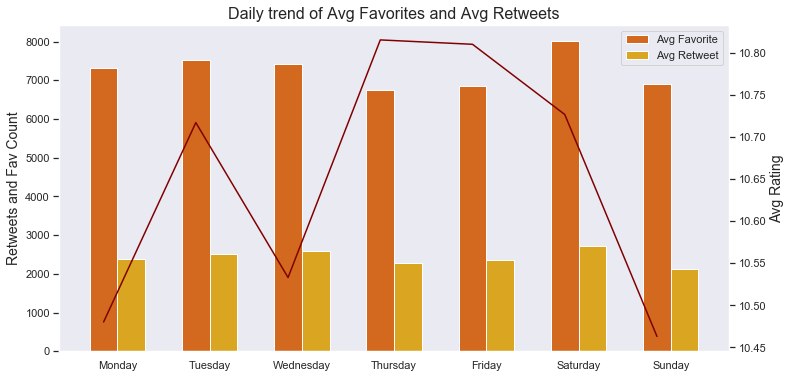

In [187]:
# Numbers of pairs of bars you want
N = 7
# Position of bars on x-axis
ind = np.arange(N)
width = 0.3
x_label = ['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday']

# Figure size
fig, ax1 = plt.subplots(figsize = (12,6))   
ax2 = ax1.twinx()

# Plotting
ax1.bar(ind, df_mean.avg_favorite , width, label='Avg Favorite', color = 'chocolate')
ax1.bar(ind + width, df_mean.avg_retweet, width , label='Avg Retweet', color = 'goldenrod')
ax1.set_ylabel('Retweets and Fav Count', fontsize=14)
ax1.grid(False)
ax1.set_xticks(ind + width / 2, x_label)
ax1.xaxis.label.set_color('red')
# Finding the best position for legends and putting it
ax1.legend(loc='best')

#2nd y
ax2.plot(ind, df_mean.avg_rating, color = 'maroon')
ax2.set_ylabel('Avg Rating', fontsize=14 )
ax2.grid(False)
ax2.get_xaxis().set_visible(False)

plt.title('Daily trend of Avg Favorites and Avg Retweets', fontsize=16)
plt.xticks(ind + width / 2, x_label, color = 'r')
plt.show()

<b>Insights</b>
- The average favorites of tweets on a Saturday are higher than any other day.
- The average retweets on Monday, Tuesday, Wednesday and Saturday are similar and slightly higher than Thursday, Friday and, Sunday.